## Global To Dos:
* read paper
* [steps document](https://docs.google.com/document/d/1du2fcmVzTqnW0FWGmUxvpR2t6QEfwxDIrHSZs9k3HZM/edit?usp=sharing)

Section 1: Load and Preprocess Data

In [1]:
import utils_preprocessing as up
import importlib
importlib.reload(up)
from itertools import groupby
import yaml
import os
import textdistance
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

Read in YAML and make PATH

In [2]:
with open("config.yml", 'r') as ymlfile:
    cfg = yaml.load(ymlfile)

PATH = os.path.join(cfg['data']['Directory'] + ":" + os.sep, cfg['data']['Folder1'], cfg['data']['Folder2'], cfg['data']['Folder3']) # Alix Path

#PATH = 'SOTU/'
#PATH = '/Users/aleistermontfort/Desktop/speeches' # Aleister Path
filetype = '*txt'

C:\Users\Alix\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


Read in Data

In [3]:
speeches = up.reading_data(PATH,'*.txt')

Create Noun Phrases

In [4]:
new_speeches = up.chunks(speeches)

Clean Words

In [5]:
clean_speeches = up.clean_words(new_speeches)

Lemmatize Words

In [6]:
words_changed = up.word_changes(clean_speeches, 0.5, 100)

In [7]:
phrases_lemmed = up.lemmed_phrases(words_changed, clean_speeches)

Counting Occurrence of Terms

In [8]:
counted_words = up.count_words(phrases_lemmed)

Limit List to Top 1000

In [9]:
top_words = up.top_x(counted_words, 1000)

limit paragraph phrases only to those in top 1000

In [10]:
limited_paragraphs = up.limit(phrases_lemmed, top_words)

In [11]:
tfidfs = up.corpus_tfidf(limited_paragraphs, counted_words, top_words)

In [12]:
periods, dissimilarity = up.periodization(tfidfs)

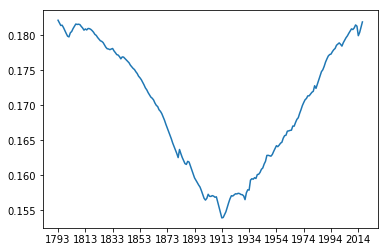

In [23]:
import matplotlib.pylab as plt
import matplotlib.ticker as ticker

lists = sorted(periods.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.axvline(1914, 0,1)
plt.plot(x, y)
plt.show()

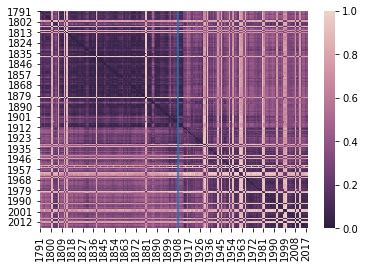

In [24]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True, reverse=True)
ax = sns.heatmap(dissimilarity, cmap=cmap)
plt.axvline((1914-pd.to_numeric(years[0])), 0,1)
plt.show()

## Before

Before Years

In [15]:
years = tfidfs.index
before_1914 = years[:(1914-pd.to_numeric(years[0]))]
before_dict = {k: v for k, v in limited_paragraphs.items() if k[1] in before_1914}

Before TFIDF

In [16]:
before_tfidfs = up.corpus_tfidf(before_dict, counted_words, top_words)

In [17]:
before_periods, before_dissimilarity = up.periodization(before_tfidfs)

## After

After Years

In [18]:
after_1914 = years[(1914-pd.to_numeric(years[0])):]
after_dict = {k: v for k, v in limited_paragraphs.items() if k[1] in after_1914}

After TFIDF

In [19]:
after_tfidfs = up.corpus_tfidf(after_dict, counted_words, top_words)

In [20]:
after_periods, after_dissimilarity = up.periodization(after_tfidfs)

In [21]:
new_periods = {**before_periods, **after_periods}

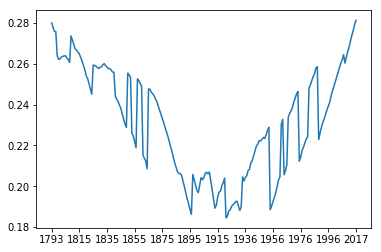

In [22]:
import matplotlib.pylab as plt
import matplotlib.ticker as ticker

lists = sorted(new_periods.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

plt.plot(x, y)
plt.show()